# Data Exploration
## Great Customer Classification

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/customers.csv')

In [3]:
print('Shape dataset:', data.shape)
data.head()

Shape dataset: (13599, 15)


,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
0,1004889,14.0,private,70773.00,9,Never-married,sales,not_caucasian,Male,0.0,0.0,40,399.0,NaN,0
1,1012811,25.0,private,76597.00,9,Divorced,sales,caucasian,Female,0.0,0.0,30,256.0,NaN,0
2,1006870,21.0,private,47947.25,10,Never-married,clerical,caucasian,Female,0.0,0.0,10,442.0,276.0,0
3,1022149,23.0,private,41740.25,7,Divorced,sales,caucasian,Female,0.0,0.0,20,NaN,NaN,0
4,1029558,26.0,private,NaN,9,Married,sales,not_caucasian,Male,NaN,0.0,36,NaN,120.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 13599 non-null  int64  
 1   age                     13178 non-null  float64
 2   workclass               13056 non-null  object 
 3   salary                  13177 non-null  float64
 4   education_rank          13599 non-null  int64  
 5   marital-status          13599 non-null  object 
 6   occupation              13056 non-null  object 
 7   race                    13599 non-null  object 
 8   sex                     13599 non-null  object 
 9   mins_beerdrinking_year  13175 non-null  float64
 10  mins_exercising_year    13178 non-null  float64
 11  works_hours             13599 non-null  int64  
 12  tea_per_year            11170 non-null  float64
 13  coffee_per_year         11188 non-null  float64
 14  great_customer_class    13599 non-null

- The dataset has 9 numeric features and 5 categorical features. 
- `great_customer_class` or target class is binary encoded.  

## 1) Health Check

In [5]:
def health_check(df, data_type):
    
    """ Checks the level of uniqueness and 
    missing values in each of the columns/features in
    a Pandas DataFrame. """
    
    df_columns = df.select_dtypes(include=data_type).columns
    print('%-27.25s' % 'Feature', '%-17.10s' % 'Unique (%)', '%-17.11s' % 'Missing (%)')
    print('-'*55)
    for feature in df_columns:
        print('%-27.25s' % feature, '%-17.2f' % (df[feature].nunique()*100/df.shape[0]),\
          '%-17.2f' % (sum(df[feature].isnull().values)*100/df.shape[0]))
    print('-'*55)

In [6]:
health_check(data, ['float', 'int', 'object'])

Feature                     Unique (%)        Missing (%)      
-------------------------------------------------------
user_id                     63.23             0.00             
age                         0.54              3.10             
workclass                   0.02              3.99             
salary                      52.99             3.10             
education_rank              0.12              0.00             
marital-status              0.03              0.00             
occupation                  0.10              3.99             
race                        0.01              0.00             
sex                         0.01              0.00             
mins_beerdrinking_year      0.71              3.12             
mins_exercising_year        0.48              3.10             
works_hours                 0.62              0.00             
tea_per_year                3.67              17.86            
coffee_per_year             3.67              17

- Around 37% of `user_id` aren't unique, are these duplicated records?
- Tea and coffee consumption is not reported 18% of the times, inpute or drop?

In [7]:
print('Duplicate rows {:.1%}'.format(sum(data.duplicated(data.columns))/data.shape[0]))

Duplicate rows 36.8%


Drop duplicate observations otherwise they're going to skew descriptive statistics.

In [8]:
unique_data = data.drop_duplicates().reset_index(drop=True)

In [9]:
health_check(unique_data, ['float', 'int', 'object'])

Feature                     Unique (%)        Missing (%)      
-------------------------------------------------------
user_id                     100.00            0.00             
age                         0.85              4.90             
workclass                   0.03              6.31             
salary                      83.80             4.91             
education_rank              0.19              0.00             
marital-status              0.05              0.00             
occupation                  0.16              6.31             
race                        0.02              0.00             
sex                         0.02              0.00             
mins_beerdrinking_year      1.12              4.93             
mins_exercising_year        0.76              4.90             
works_hours                 0.98              0.00             
tea_per_year                5.80              28.25            
coffee_per_year             5.80              28

## 2) Descriptive Statistics

In [10]:
unique_data.describe(include=['float'])

,age,salary,mins_beerdrinking_year,mins_exercising_year,tea_per_year,coffee_per_year
count,8178.000000,8177.000000,8175.000000,8178.000000,6170.000000,6188.000000
mean,36.185865,47094.141036,721.878165,74.179384,251.536305,247.158209
std,14.752698,26309.594856,6054.730978,370.706099,144.512387,143.829770
min,14.000000,4872.750000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,29328.250000,0.000000,0.000000,125.000000,123.000000
50%,34.000000,44423.750000,0.000000,0.000000,252.000000,248.000000
75%,46.000000,59118.000000,0.000000,0.000000,378.000000,370.000000
max,90.000000,363858.750000,99999.000000,3900.000000,499.000000,499.000000


- `mins_beerdrinking_year` and `mins_exercising_year` show a standard deviation that is greater than the mean, most likely due to extreme values in the data (25th, 50th, and 75th percentiles are 0).

In [11]:
unique_data.describe(include=['int'])

,user_id,education_rank,works_hours,great_customer_class
count,8.599000e+03,8599.000000,8599.000000,8599.000000
mean,1.024392e+06,9.905222,39.867659,0.135830
std,1.409441e+04,2.492598,12.373263,0.342628
min,1.000006e+06,1.000000,1.000000,0.000000
25%,1.012154e+06,9.000000,38.000000,0.000000
50%,1.024334e+06,10.000000,40.000000,0.000000
75%,1.036660e+06,11.000000,45.000000,0.000000
max,1.048839e+06,16.000000,99.000000,1.000000


- Class imbalance problem: 13.6% of the database are **great customers**. ML algorithms would overfit to the majority class to maximize the level of accuracy, resulting in excepcionally good models at predicting the negative class for any new incoming observation.
- Potential solutions: class weightining, undersampling, oversampling or synthetic data.

In [12]:
unique_data.describe(include=['object'])

,workclass,marital-status,occupation,race,sex
count,8056,8599,8056,8599,8599
unique,3,4,14,2,2
top,private,Married,craft,caucasian,Male
freq,5957,3559,1114,7313,5597


- Most common customer is male (65%), caucasian (85%), married (41%), crafts stuff (13%) and works for a private company (69%) (but not necesarily this specific description!).

In [13]:
print(unique_data['occupation'].value_counts())
unique_data['occupation'].replace({'soldier': 'other','estate_agent': 'other'}, inplace=True)

craft           1114
clerical         999
professional     984
service          973
executive        953
sales            920
factory          555
trucker          414
cleaner          399
farm             301
tech             234
lawenf           161
estate_agent      47
soldier            2
Name: occupation, dtype: int64


In [14]:
print(unique_data['marital-status'].value_counts())

Married          3559
Never-married    3141
Divorced         1625
Widowed           274
Name: marital-status, dtype: int64


In [15]:
print(unique_data['workclass'].value_counts())

private          5957
government       1127
self_employed     972
Name: workclass, dtype: int64


In [16]:
print(unique_data['race'].value_counts())

caucasian        7313
not_caucasian    1286
Name: race, dtype: int64


In [17]:
print(unique_data['sex'].value_counts())

Male      5597
Female    3002
Name: sex, dtype: int64


## 3) Target class distribution

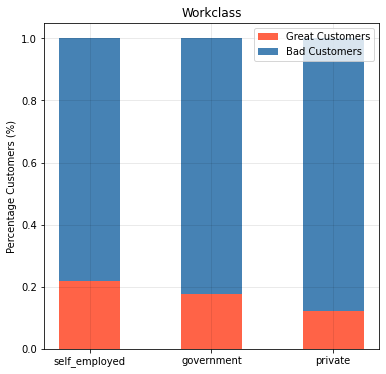

In [18]:
# Get workclass stats
workclass = unique_data.groupby(['workclass'])\
['great_customer_class'].describe().sort_values(by='mean', ascending=False)
# Plot a barchart
plt.figure(figsize=(6, 6))
plt.bar(workclass.index, workclass['mean'].values, width=0.50, label='Great Customers', color='tomato')
plt.bar(workclass.index, 1-workclass['mean'].values, bottom=workclass['mean'].values, 
        width=0.50, label='Bad Customers', color='steelblue')
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Percentage Customers (%)')
plt.legend()
plt.title('Workclass')
plt.show();

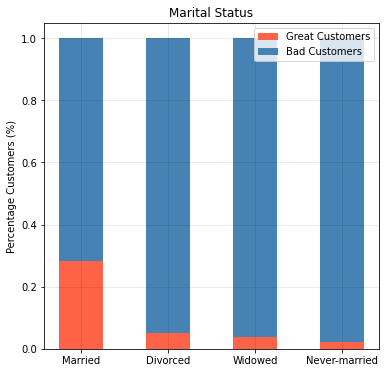

In [19]:
# Get marital status stats
marital_status = unique_data.groupby(['marital-status'])\
['great_customer_class'].describe().sort_values(by='mean', ascending=False)
# Plot a barchart
plt.figure(figsize=(6, 6))
plt.bar(marital_status.index, marital_status['mean'].values, width=0.50, label='Great Customers', color='tomato')
plt.bar(marital_status.index, 1-marital_status['mean'].values, bottom=marital_status['mean'].values, 
        width=0.50, label='Bad Customers', color='steelblue')
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Percentage Customers (%)')
plt.legend()
plt.title('Marital Status')
plt.show();

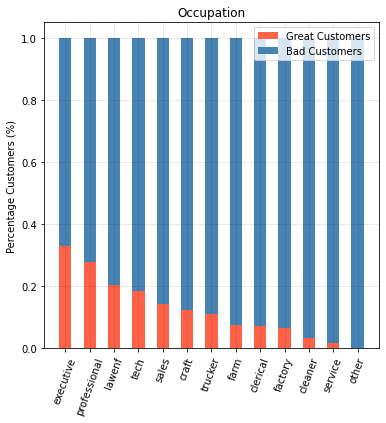

In [20]:
# Get marital status stats
occupation = unique_data.groupby(['occupation'])\
['great_customer_class'].describe().sort_values(by='mean', ascending=False)
# Plot a barchart
plt.figure(figsize=(6, 6))
plt.bar(occupation.index, occupation['mean'].values, width=0.50, label='Great Customers', color='tomato')
plt.bar(occupation.index, 1-occupation['mean'].values, bottom=occupation['mean'].values, 
        width=0.50, label='Bad Customers', color='steelblue')
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Percentage Customers (%)')
plt.legend()
plt.title('Occupation')
plt.xticks(rotation=70)
plt.show();

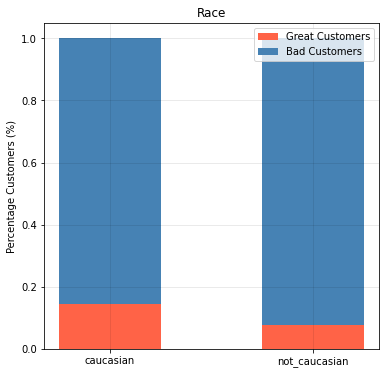

In [21]:
# Get marital status stats
race = unique_data.groupby(['race'])\
['great_customer_class'].describe().sort_values(by='mean', ascending=False)
# Plot a barchart
plt.figure(figsize=(6, 6))
plt.bar(race.index, race['mean'].values, width=0.50, label='Great Customers', color='tomato')
plt.bar(race.index, 1-race['mean'].values, bottom=race['mean'].values, 
        width=0.50, label='Bad Customers', color='steelblue')
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Percentage Customers (%)')
plt.legend()
plt.title('Race')
plt.show();

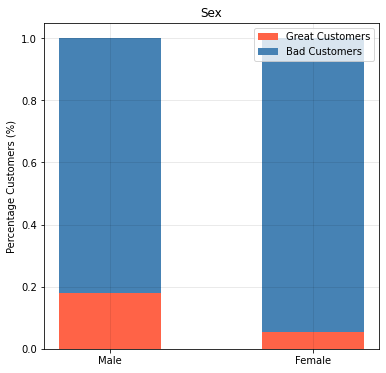

In [22]:
# Get marital status stats
sex = unique_data.groupby(['sex'])\
['great_customer_class'].describe().sort_values(by='mean', ascending=False)
# Plot a barchart
plt.figure(figsize=(6, 6))
plt.bar(sex.index, sex['mean'].values, width=0.50, label='Great Customers', color='tomato')
plt.bar(sex.index, 1-sex['mean'].values, bottom=sex['mean'].values, 
        width=0.50, label='Bad Customers', color='steelblue')
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Percentage Customers (%)')
plt.legend()
plt.title('Sex')
plt.show();

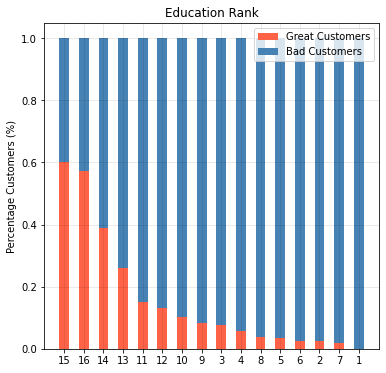

In [23]:
# Get marital status stats
education_rank = unique_data.groupby(['education_rank'])\
['great_customer_class'].describe().sort_values(by='mean', ascending=False)
# Plot a barchart
plt.figure(figsize=(6, 6))
plt.bar(education_rank.index.map(str), education_rank['mean'].values, width=0.50, label='Great Customers', color='tomato')
plt.bar(education_rank.index.map(str), 1-education_rank['mean'].values, bottom=education_rank['mean'].values, 
        width=0.50, label='Bad Customers', color='steelblue')
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Percentage Customers (%)')
plt.legend()
plt.title('Education Rank')
plt.show();

Looking at the categorical features in the dataset, a great customer is more likely to be male (15%), caucasian (12%), executive (33%), married (28%) self-employed (18%) and has a high level of education (60%).

In [24]:
# Query the dataset looking for the most likely great customer
unique_data[(unique_data['sex'] == 'Male') &\
            (unique_data['race'] == 'caucasian') &\
            (unique_data['occupation'] == 'executive') &\
            (unique_data['marital-status'] == 'Married') &\
            (unique_data['workclass'] == 'self_employed')].describe()

,user_id,age,salary,education_rank,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
count,1.160000e+02,112.000000,110.000000,116.000000,114.000000,113.000000,116.000000,87.000000,75.000000,116.000000
mean,1.025908e+06,49.767857,44417.506818,10.689655,3526.157895,138.123894,44.034483,246.195402,289.880000,0.413793
std,1.426283e+04,13.966486,25665.656589,2.486184,16221.218153,503.894142,13.814253,133.840311,131.694154,0.494649
min,1.000527e+06,19.000000,6625.500000,4.000000,0.000000,0.000000,8.000000,16.000000,19.000000,0.000000
25%,1.014770e+06,40.750000,27787.875000,9.000000,0.000000,0.000000,40.000000,157.000000,188.500000,0.000000
50%,1.027053e+06,49.000000,39194.125000,10.000000,0.000000,0.000000,45.000000,235.000000,306.000000,0.000000
75%,1.038558e+06,60.000000,58197.875000,13.000000,0.000000,0.000000,50.000000,360.500000,392.500000,1.000000
max,1.048438e+06,80.000000,131790.500000,16.000000,99999.000000,2246.000000,99.000000,492.000000,490.000000,1.000000


41% of these customers are great customers, but they only represent 13% of the total number of great customers:

- Numerical data is important for the classification. 
- The relationship between the features and the target class is most probably not linear.

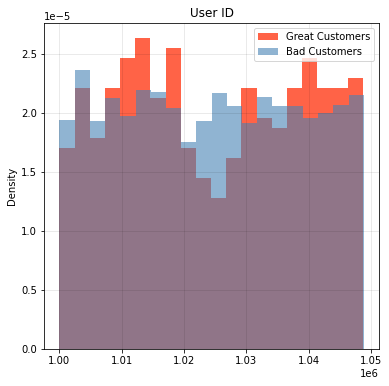

In [25]:
plt.figure(figsize=(6, 6))
plt.hist(unique_data[unique_data['great_customer_class'] == 1].dropna()['user_id'].values, 
         density=True, color='tomato', label='Great Customers', bins=20)
plt.hist(unique_data[unique_data['great_customer_class'] == 0].dropna()['user_id'].values, 
         density=True, color='steelblue', alpha=0.6, label='Bad Customers', bins=20)
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Density')
plt.legend()
plt.title('User ID')
plt.show();

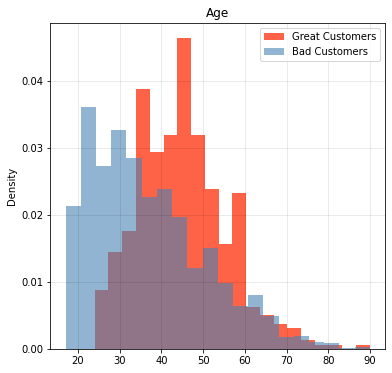

In [26]:
plt.figure(figsize=(6, 6))
plt.hist(unique_data[unique_data['great_customer_class'] == 1].dropna()['age'].values, 
         density=True, color='tomato', label='Great Customers', bins=20)
plt.hist(unique_data[unique_data['great_customer_class'] == 0].dropna()['age'].values, 
         density=True, color='steelblue', alpha=0.6, label='Bad Customers', bins=20)
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Density')
plt.legend()
plt.title('Age')
plt.show();

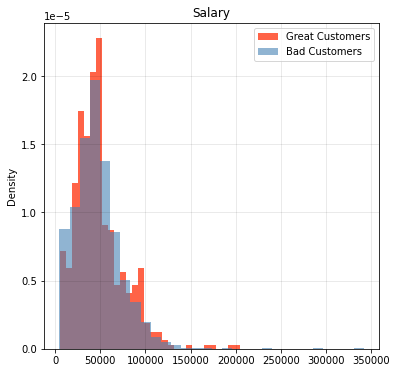

In [27]:
plt.figure(figsize=(6, 6))
plt.hist(unique_data[unique_data['great_customer_class'] == 1].dropna()['salary'].values, 
         density=True, color='tomato', label='Great Customers', bins=30)
plt.hist(unique_data[unique_data['great_customer_class'] == 0].dropna()['salary'].values, 
         density=True, color='steelblue', alpha=0.6, label='Bad Customers', bins=30)
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Density')
plt.legend()
plt.title('Salary')
plt.show();

There are some extreme values (long right tail) in the salary that may be problematic. We can perform a log transformation to the data and make the distribution more normal-like reducing the skewness. 

In [28]:
unique_data.loc[:, 'log_salary'] = pd.Series(np.log(1 + unique_data['salary'].values), index=unique_data.index)

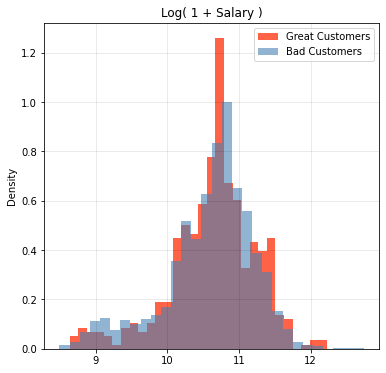

In [29]:
plt.figure(figsize=(6, 6))
plt.hist(unique_data[unique_data['great_customer_class'] == 1].dropna()['log_salary'].values, 
         density=True, color='tomato', label='Great Customers', bins=30)
plt.hist(unique_data[unique_data['great_customer_class'] == 0].dropna()['log_salary'].values, 
         density=True, color='steelblue', alpha=0.6, label='Bad Customers', bins=30)
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Density')
plt.legend()
plt.title('Log( 1 + Salary )')
plt.show();

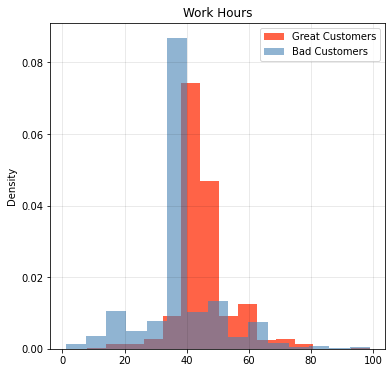

In [30]:
plt.figure(figsize=(6, 6))
plt.hist(unique_data[unique_data['great_customer_class'] == 1].dropna()['works_hours'].values, 
         density=True, color='tomato', label='Great Customers', bins=15)
plt.hist(unique_data[unique_data['great_customer_class'] == 0].dropna()['works_hours'].values, 
         density=True, color='steelblue', alpha=0.6, label='Bad Customers', bins=15)
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Density')
plt.legend()
plt.title('Work Hours')
plt.show();

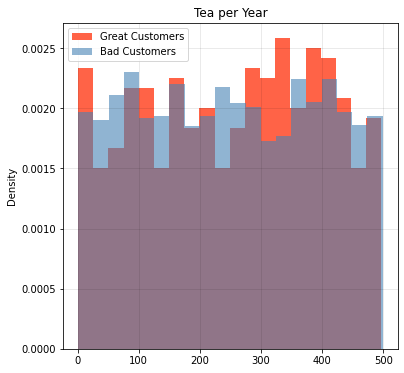

In [31]:
plt.figure(figsize=(6, 6))
plt.hist(unique_data[unique_data['great_customer_class'] == 1].dropna()['tea_per_year'].values, 
         density=True, color='tomato', label='Great Customers', bins=20)
plt.hist(unique_data[unique_data['great_customer_class'] == 0].dropna()['tea_per_year'].values, 
         density=True, color='steelblue', alpha=0.6, label='Bad Customers', bins=20)
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Density')
plt.legend()
plt.title('Tea per Year')
plt.show();

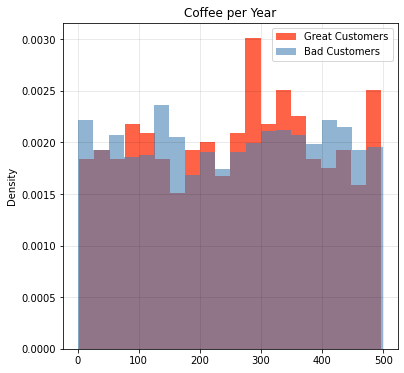

In [32]:
plt.figure(figsize=(6, 6))
plt.hist(unique_data[unique_data['great_customer_class'] == 1].dropna()['coffee_per_year'].values, 
         density=True, color='tomato', label='Great Customers', bins=20)
plt.hist(unique_data[unique_data['great_customer_class'] == 0].dropna()['coffee_per_year'].values, 
         density=True, color='steelblue', alpha=0.6, label='Bad Customers', bins=20)
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Density')
plt.legend()
plt.title('Coffee per Year')
plt.show();

`coffee_per_year` and `tea_per_year` do not seem very useful. Nevertheless, we consider them for training in case they help find non-linear patterns.

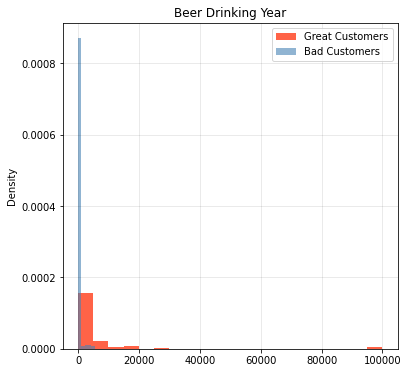

In [33]:
plt.figure(figsize=(6, 6))
plt.hist(unique_data[unique_data['great_customer_class'] == 1].dropna()['mins_beerdrinking_year'].values, 
         density=True, color='tomato', label='Great Customers', bins=20)
plt.hist(unique_data[unique_data['great_customer_class'] == 0].dropna()['mins_beerdrinking_year'].values, 
         density=True, color='steelblue', alpha=0.6, label='Bad Customers', bins=20)
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Density')
plt.legend()
plt.title('Beer Drinking Year')
plt.show();

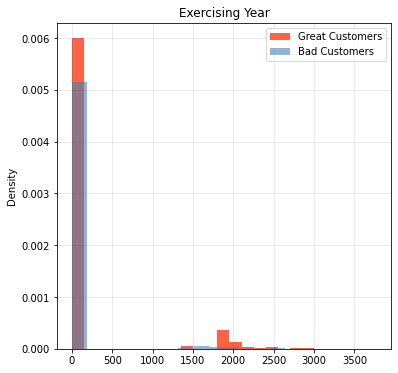

In [34]:
plt.figure(figsize=(6, 6))
plt.hist(unique_data[unique_data['great_customer_class'] == 1].dropna()['mins_exercising_year'].values, 
         density=True, color='tomato', label='Great Customers', bins=20)
plt.hist(unique_data[unique_data['great_customer_class'] == 0].dropna()['mins_exercising_year'].values, 
         density=True, color='steelblue', alpha=0.6, label='Bad Customers', bins=20)
plt.grid(True, alpha=0.1, color='black')
plt.ylabel('Density')
plt.legend()
plt.title('Exercising Year')
plt.show();

In [35]:
unique_data.groupby(['great_customer_class'])[['mins_beerdrinking_year', 'mins_exercising_year']].describe()

mins_beerdrinking_year                                  \
                                      count         mean           std  min   
great_customer_class                                                          
0                                    7056.0   135.008503    743.211539  0.0   
1                                    1119.0  4422.461126  15769.070193  0.0   

                                             mins_exercising_year              \
                      25%  50%  75%      max                count        mean   
great_customer_class                                                            
0                     0.0  0.0  0.0  22040.0               7062.0   52.557916   
1                     0.0  0.0  0.0  99999.0               1116.0  210.999104   

                                                              
                             std  min  25%  50%  75%     max  
great_customer_class                                          
0                     310.493020  0.0  0.0  0.0  0.0  3900.0  
1                     612.861618  0.0  0.0  0.0  0.0  3004.0

`mins_beerdrinking_year` and `mins_exercising_year` take mostly zero values.

## 4) Pearson correlation

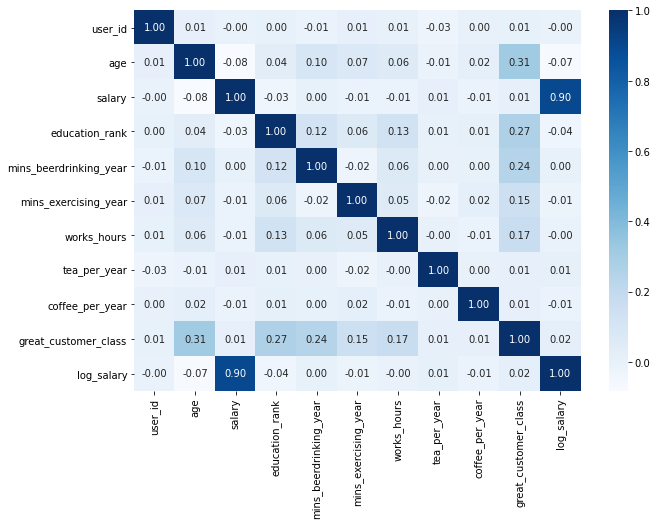

In [36]:
plt.figure(figsize=(10, 7))
sns.heatmap(unique_data.corr(), annot=True, fmt='.2f', cmap='Blues');

Low correlation and independent predictors. This discards **multicollinearity** problems that could make linear models not able to distinguish between the individual effects of the independent variables on the dependent variable.

## 5) Missing values

In [37]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [38]:
clean_data = unique_data.drop(['user_id', 'salary', 'sex', 'race'], axis=1)

Drop `sex` and `race` to avoid any gender or racial bias in the decision-making of the model. This is a growing area of research in ML and soon will become part of every data science process. It is important to detect any potential biases in the data that could negatively impact specific user groups.

In [39]:
health_check(clean_data, ['float', 'int', 'object'])

Feature                     Unique (%)        Missing (%)      
-------------------------------------------------------
age                         0.85              4.90             
workclass                   0.03              6.31             
education_rank              0.19              0.00             
marital-status              0.05              0.00             
occupation                  0.15              6.31             
mins_beerdrinking_year      1.12              4.93             
mins_exercising_year        0.76              4.90             
works_hours                 0.98              0.00             
tea_per_year                5.80              28.25            
coffee_per_year             5.80              28.04            
great_customer_class        0.02              0.00             
log_salary                  83.80             4.91             
-------------------------------------------------------


`workclass` and `occupation` have the same percentage of missing values. In fact, when `workclass` is null then `occupation` is null as well. Instead of imputing values for these two features, we will encode them as dummy variables and users that have not provided any information regarding their work status will be populated with 0 for all the different levels of the feature. For instance: 

A user that works in tech:

| tech | sales | trucker | ... | executive |
|:----:|:-----:|:-------:|:---:|:---------:|
|   1  |   0   |    0    |  0  |     0     |

A user we don't have information about:

| tech | sales | trucker | ... | executive |
|:----:|:-----:|:-------:|:---:|:---------:|
|   0  |   0   |    0    |  0  |     0     |


In [40]:
# Create dummies
clean_data = pd.get_dummies(clean_data)

# Split X and y 
X = clean_data.loc[:, clean_data.columns != 'great_customer_class']
y = clean_data.loc[:, clean_data.columns == 'great_customer_class']

# Make sure both train and test sets have the same proportion of great customers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [41]:
# Create instances of the scaler and KNN Imputer
scaler = MinMaxScaler()
imputer = KNNImputer(n_neighbors=10, weights='distance')

# Fit on training set
scaler.fit(X_train)
imputer.fit(X_train)

# Transform training set
Xt_train = scaler.transform(X_train)
Xt_train = imputer.transform(Xt_train)

# Transform test set
Xt_test = scaler.transform(X_test)
Xt_test = imputer.transform(Xt_test)

In [42]:
print('Missing values in training set:', np.isnan(np.max(Xt_train)))
print('Missing values in test set:', np.isnan(np.max(Xt_test)))

Missing values in training set: False
Missing values in test set: False


In [43]:
print('Training set shape:', Xt_train.shape)
print('Test set shape:', Xt_train.shape)

Training set shape: (6879, 28)
Test set shape: (6879, 28)


## 6) Synthetic Minority Oversampling Technique (SMOTE) + Random Undersampling 

Sample a random observation from the minority class. Then k of the nearest neighbors for that example are found. A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space. Ramdomly drop observations from the majority class until a required ratio of positive-to-negative class distribution is met. 

In [44]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [45]:
over = SMOTE(sampling_strategy=0.25, k_neighbors=10, random_state=0)
under = RandomUnderSampler(sampling_strategy=0.40, random_state=0)

In [46]:
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

Xs, ys = pipeline.fit_resample(Xt_train, y_train)

In [47]:
print('Previous ratio: {:.2f}'.format(np.sum(y_train.values) / (len(y_train) - np.sum(y_train.values))))
print('Previous training instances:', len(Xt_train))
print('Current ratio: {:.2f}'.format(np.sum(ys.values) / (len(ys) - np.sum(ys.values))))
print('Current training instances:', len(Xs))

Previous ratio: 0.16
Previous training instances: 6879
Current ratio: 0.40
Current training instances: 5201


The ratio of the number of samples in the minority class over the number of samples in the majority class after resampling is 0.40. 

## 6) Preprocessing Pipeline

- **(i)** Remove duplicate rows. 
- **(ii)** Drop `user_id`, `sex` and `race`.  
- **(iii)** Categorical features `occupation`, `marital-status` and `workclass` to one-hot encoding. `education_rank` is already transformed using ordinal encoding - order matters.  
- **(iv)** Log-transform `salary`.
- **(v)** Normalize features.
- **(vi)** Impute `age`, `log_salary`, `tea_per_year`, `coffee_per_year`, `mins_beerdrinking_year`and `min_execising_year` missing values using the average feature value of the 10 closest neighbors in feature space (KNN Imputer).
- **(vii)** Apply SMOTE + RU to achieve a 0.40 ratio of samples in the minority class over the samples in the majority class.